In [ ]:
# -*- coding: utf-8 -*-
# Authors: Chitta Ranjan <cran2367@gmail.com>
#
# License: BSD 3 clause

# Sgt definition.

## Purpose

Sequence Graph Transform (SGT) is a sequence embedding function. SGT extracts the short- and long-term sequence features and embeds them in a finite-dimensional feature space. With SGT you can tune the amount of short- to long-term patterns extracted in the embeddings without any  increase in the computation."

```class Sgt():
    '''
    Compute embedding of a single or a collection of discrete item 
    sequences. A discrete item sequence is a sequence made from a set
    discrete elements, also known as alphabet set. For example,
    suppose the alphabet set is the set of roman letters, 
    {A, B, ..., Z}. This set is made of discrete elements. Examples of
    sequences from such a set are AABADDSA, UADSFJPFFFOIHOUGD, etc.
    Such sequence datasets are commonly found in online industry,
    for example, item purchase history, where the alphabet set is
    the set of all product items. Sequence datasets are abundant in
    bioinformatics as protein sequences.
    Using the embeddings created here, classification and clustering
    models can be built for sequence datasets.
    Read more in https://arxiv.org/pdf/1608.03533.pdf
    '''
```
    Parameters
    ----------
    Input:

    alphabets       Optional, except if mode is Spark. 
                    The set of alphabets that make up all 
                    the sequences in the dataset. If not passed, the
                    alphabet set is automatically computed as the 
                    unique set of elements that make all the sequences.
                    A list or 1d-array of the set of elements that make up the      
                    sequences. For example, np.array(["A", "B", "C"].
                    If mode is 'spark', the alphabets are necessary.

    kappa           Tuning parameter, kappa > 0, to change the extraction of 
                    long-term dependency. Higher the value the lesser
                    the long-term dependency captured in the embedding.
                    Typical values for kappa are 1, 5, 10.

    lengthsensitive Default false. This is set to true if the embedding of
                    should have the information of the length of the sequence.
                    If set to false then the embedding of two sequences with
                    similar pattern but different lengths will be the same.
                    lengthsensitive = false is similar to length-normalization.
                    
    flatten         Default True. If True the SGT embedding is flattened and returned as
                    a vector. Otherwise, it is returned as a matrix with the row and col
                    names same as the alphabets. The matrix form is used for            
                    interpretation purposes. Especially, to understand how the alphabets
                    are "related". Otherwise, for applying machine learning or deep
                    learning algorithms, the embedding vectors are required.
    
    mode            Choices in {'default', 'multiprocessing', 'spark'}.
    
    processors      Used if mode is 'multiprocessing'. By default, the 
                    number of processors used in multiprocessing is
                    number of available - 1.
    
    lazy            Used if mode is 'spark'. Default is False. If False,
                    the SGT embeddings are computed for each sequence
                    in the inputted RDD and returned as a list of 
                    embedding vectors. Otherwise, the RDD map is returned.
    '''

    Attributes
    ----------
    def fit(sequence)
    
    Extract Sequence Graph Transform features using Algorithm-2 in https://arxiv.org/abs/1608.03533.
    Input:
    sequence        An array of discrete elements. For example,
                    np.array(["B","B","A","C","A","C","A","A","B","A"].
                    
    Output: 
    sgt embedding   sgt matrix or vector (depending on Flatten==False or True) of the sequence
    
    
    --
    def fit_transform(corpus)
    
    Extract SGT embeddings for all sequences in a corpus. It finds
    the alphabets encompassing all the sequences in the corpus, if not inputted. 
    However, if the mode is 'spark', then the alphabets list has to be
    explicitly given in Sgt object declaration.
    
    Input:
    corpus          A list of sequences. Each sequence is a list of alphabets.
    
    Output:
    sgt embedding of all sequences in the corpus.
    
    
    --
    def transform(corpus)
    
    Find SGT embeddings of a new data sample belonging to the same population
    of the corpus that was fitted initially.

## Illustrative examples

In [1]:
import numpy as np
import pandas as pd
from itertools import chain
import warnings

########
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics
import time

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(7) # fix random seed for reproducibility

from sgt import Sgt

Using TensorFlow backend.


## Installation Test Examples

In [2]:
# Learning a sgt embedding as a matrix with 
# rows and columns as the sequence alphabets. 
# This embedding shows the relationship between 
# the alphabets. The higher the value the 
# stronger the relationship.

sgt = Sgt(flatten=False)
sequence = np.array(["B","B","A","C","A","C","A","A","B","A"])
sgt.fit(sequence)

,A,B,C
A,0.906163,1.310023,2.618487
B,0.865694,1.230423,0.525440
C,1.371416,0.282625,1.353353


In [3]:
# Learning the sgt embeddings as vector for
# all sequences in a corpus.

sgt = Sgt(kappa=1, lengthsensitive=False)
corpus = [["B","B","A","C","A","C","A","A","B","A"], ["C", "Z", "Z", "Z", "D"]]

s = sgt.fit_transform(corpus)
print(s)

[[0.90616284 1.31002279 2.6184865  0.         0.         0.86569371
  1.23042262 0.52543984 0.         0.         1.37141609 0.28262508
  1.35335283 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.09157819 0.92166965 0.         0.         0.
  0.         0.         0.         0.         0.         0.92166965
  1.45182361]]


In [4]:
# Change the parameters from default to
# a tuned value.

sgt = Sgt(kappa=5, lengthsensitive=True)
corpus = [["B","B","A","C","A","C","A","A","B","A"], ["C", "Z", "Z", "Z", "D"]]

s = sgt.fit_transform(corpus)
print(s)

[[0.23305129 0.2791752  0.33922608 0.         0.         0.26177435
  0.29531212 0.10270374 0.         0.         0.28654051 0.04334255
  0.13533528 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.01831564 0.29571168 0.         0.         0.
  0.         0.         0.         0.         0.         0.29571168
  0.3394528 ]]


In [5]:
# Change the mode for faster computation.
# Mode: 'multiprocessing'
# Uses the multiple processors (CPUs) avalaible.

corpus = [["B","B","A","C","A","C","A","A","B","A"], ["C", "Z", "Z", "Z", "D"]]

sgt = Sgt(mode='multiprocessing')
s = sgt.fit_transform(corpus)
print(s)

[[0.90616284 1.31002279 2.6184865  0.         0.         0.86569371
  1.23042262 0.52543984 0.         0.         1.37141609 0.28262508
  1.35335283 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.09157819 0.92166965 0.         0.         0.
  0.         0.         0.         0.         0.         0.92166965
  1.45182361]]


In [ ]:
# Change the mode for faster computation.
# Mode: 'spark'
# Uses spark RDD.

from pyspark import SparkContext
sc = SparkContext("local", "app")

corpus = [["B","B","A","C","A","C","A","A","B","A"], ["C", "Z", "Z", "Z", "D"]]

rdd = sc.parallelize(corpus)

sgt_sc = sgt.Sgt(kappa = 1, 
                 lengthsensitive = False, 
                 mode="spark", 
                 alphabets=["A", "B", "C", "D", "Z"],
                 lazy=False)

s = sgt_sc.fit_transform(corpus=rdd)

print(s)

# Real data examples

## Protein Sequence Data Analysis

The data used here is taken from www.uniprot.org. This is a public database for proteins. The data contains the protein sequences and their functions. In the following, we will demonstrate 
- clustering of the sequences.
- classification of the sequences with the functions as labels.

In [7]:
protein_data=pd.read_csv('../data/protein_classification.csv')
X=protein_data['Sequence']
def split(word): 
    return [char for char in word] 

sequences = [split(x) for x in X]
print(sequences[0])

['M', 'E', 'I', 'E', 'K', 'T', 'N', 'R', 'M', 'N', 'A', 'L', 'F', 'E', 'F', 'Y', 'A', 'A', 'L', 'L', 'T', 'D', 'K', 'Q', 'M', 'N', 'Y', 'I', 'E', 'L', 'Y', 'Y', 'A', 'D', 'D', 'Y', 'S', 'L', 'A', 'E', 'I', 'A', 'E', 'E', 'F', 'G', 'V', 'S', 'R', 'Q', 'A', 'V', 'Y', 'D', 'N', 'I', 'K', 'R', 'T', 'E', 'K', 'I', 'L', 'E', 'D', 'Y', 'E', 'M', 'K', 'L', 'H', 'M', 'Y', 'S', 'D', 'Y', 'I', 'V', 'R', 'S', 'Q', 'I', 'F', 'D', 'Q', 'I', 'L', 'E', 'R', 'Y', 'P', 'K', 'D', 'D', 'F', 'L', 'Q', 'E', 'Q', 'I', 'E', 'I', 'L', 'T', 'S', 'I', 'D', 'N', 'R', 'E']


### Generating sequence embeddings

In [14]:
sgt = Sgt(kappa=1, lengthsensitive=False, mode='multiprocessing')

In [15]:
%%time
embedding = sgt.fit_transform(corpus=sequences)

CPU times: user 79.5 ms, sys: 46 ms, total: 125 ms
Wall time: 6.61 s


In [16]:
embedding.shape

(2112, 400)

#### Sequence Clustering
We perform PCA on the sequence embeddings and then do kmeans clustering.

In [17]:
pca = PCA(n_components=2)
pca.fit(embedding)
X=pca.transform(embedding)

print(np.sum(pca.explained_variance_ratio_))
df = pd.DataFrame(data=X, columns=['x1', 'x2'])
df.head()

0.6432744907364913


,x1,x2
0,0.384913,-0.269873
1,0.022764,0.135995
2,0.177792,-0.172454
3,0.168074,-0.147334
4,0.383616,-0.271163


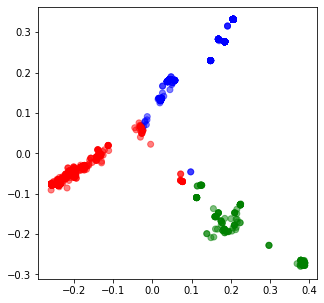

In [18]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

#### Sequence Classification
We perform PCA on the sequence embeddings and then do kmeans clustering.

In [19]:
y = protein_data['Function [CC]']
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

We will perform a 10-fold cross-validation to measure the performance of the classification model.

In [21]:
kfold = 10
X = pd.DataFrame(embedding)
y = encoded_y

random_state = 1

test_F1 = np.zeros(kfold)
skf = KFold(n_splits = kfold, shuffle = True, random_state = random_state)
k = 0
epochs = 50
batch_size = 128

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = Sequential()
    model.add(Dense(64, input_shape = (X_train.shape[1],))) 
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X_train, y_train ,batch_size=batch_size, epochs=epochs, verbose=0)
    
    y_pred = model.predict_proba(X_test).round().astype(int)
    y_train_pred = model.predict_proba(X_train).round().astype(int)

    test_F1[k] = sklearn.metrics.f1_score(y_test, y_pred)
    k+=1
    
print ('Average f1 score', np.mean(test_F1))

Average f1 score 1.0


## Weblog Data Analysis
This data sample is taken from https://www.ll.mit.edu/r-d/datasets/1998-darpa-intrusion-detection-evaluation-dataset. 
This is a network intrusion data containing audit logs and any attack as a positive label. Since, network intrusion is a rare event, the data is unbalanced. Here we will,
- build a sequence classification model to predict a network intrusion.

Each sequence contains in the data is a series of activity, for example, {login, password}. The _alphabets_ in the input data sequences are already encoded into integers. The original sequences data file is also present in the `/data` directory.

In [23]:
darpa_data = pd.read_csv('../data/darpa_data.csv')
darpa_data.columns

Index(['timeduration', 'seqlen', 'seq', 'class'], dtype='object')

In [24]:
X = darpa_data['seq']
sequences = [x.split('~') for x in X]

In [25]:
y = darpa_data['class']
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

### Generating sequence embeddings
In this data, the sequence embeddings should be length-sensitive. The lengths are important here because sequences with similar patterns but different lengths can have different labels. Consider a simple example of two sessions: `{login, pswd, login, pswd,...}` and `{login, pswd,...(repeated several times)..., login, pswd}`. While the first session can be a regular user mistyping the password once, the other session is possibly an attack to guess the password. Thus, the sequence lengths are as important as the patterns.

In [26]:
sgt_darpa = Sgt(kappa=5, lengthsensitive=True, mode='multiprocessing')

In [27]:
embedding = sgt_darpa.fit_transform(corpus=sequences)

In [28]:
pd.DataFrame(embedding).to_csv(path_or_buf='tmp.csv', index=False)
pd.DataFrame(embedding).head()

,0,1,2,3,4,5,6,7,8,9,...,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400
0,0.069114,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00
1,0.000000,0.0,4.804190e-09,7.041516e-10,0.0,2.004958e-12,0.000132,1.046458e-07,5.863092e-16,7.568986e-23,...,0.0,0.0,0.0,0.0,0.0,0.540296,5.739230e-32,0.0,0.000000e+00,0.000000e+00
2,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00
3,0.785666,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,1.950089e-03,2.239981e-04,2.343180e-07,...,0.0,0.0,0.0,0.0,0.0,0.528133,1.576703e-09,0.0,2.516644e-29,1.484843e-57
4,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00


#### Applying PCA on the embeddings
The embeddings are sparse. We, therefore, apply PCA on the embeddings.

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=35)
pca.fit(embedding)
X = pca.transform(embedding)
print(np.sum(pca.explained_variance_ratio_))

0.9887812978739061


#### Building a Multi-Layer Perceptron Classifier
The PCA transforms of the embeddings are used directly as inputs to an MLP classifier.

In [30]:
kfold = 3
random_state = 11

test_F1 = np.zeros(kfold)
time_k = np.zeros(kfold)
skf = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=random_state)
k = 0
epochs = 300
batch_size = 15

# class_weight = {0 : 1., 1: 1.,}  # The weights can be changed and made inversely proportional to the class size to improve the accuracy.
class_weight = {0 : 0.12, 1: 0.88,}

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],))) 
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    start_time = time.time()
    model.fit(X_train, y_train ,batch_size=batch_size, epochs=epochs, verbose=1, class_weight=class_weight)
    end_time = time.time()
    time_k[k] = end_time-start_time

    y_pred = model.predict_proba(X_test).round().astype(int)
    y_train_pred = model.predict_proba(X_train).round().astype(int)
    test_F1[k] = sklearn.metrics.f1_score(y_test, y_pred)
    k += 1

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               4608      
_________________________________________________________________
activation_30 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 129       
_________________________________________________________________
activation_31 (Activation)   (None, 1)                 0         
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________
  ...
    to  
  ['...']
Train on 74 samples
Epoch 1/300
74/74 [==============================] - 0s 6ms/sample - los

74/74 [==============================] - 0s 117us/sample - loss: 0.0349 - accuracy: 0.8649
Epoch 70/300
74/74 [==============================] - 0s 121us/sample - loss: 0.0328 - accuracy: 0.8784
Epoch 71/300
74/74 [==============================] - 0s 114us/sample - loss: 0.0359 - accuracy: 0.8649
Epoch 72/300
74/74 [==============================] - 0s 138us/sample - loss: 0.0383 - accuracy: 0.8514
Epoch 73/300
74/74 [==============================] - 0s 120us/sample - loss: 0.0366 - accuracy: 0.8649
Epoch 74/300
74/74 [==============================] - 0s 123us/sample - loss: 0.0359 - accuracy: 0.8919
Epoch 75/300
74/74 [==============================] - 0s 119us/sample - loss: 0.0395 - accuracy: 0.8514
Epoch 76/300
74/74 [==============================] - 0s 113us/sample - loss: 0.0363 - accuracy: 0.8649
Epoch 77/300
74/74 [==============================] - 0s 113us/sample - loss: 0.0346 - accuracy: 0.8784
Epoch 78/300
74/74 [==============================] - 0s 108us/sample - loss:

74/74 [==============================] - 0s 121us/sample - loss: 0.0328 - accuracy: 0.8649
Epoch 148/300
74/74 [==============================] - 0s 114us/sample - loss: 0.0321 - accuracy: 0.8649
Epoch 149/300
74/74 [==============================] - 0s 120us/sample - loss: 0.0286 - accuracy: 0.8649
Epoch 150/300
74/74 [==============================] - 0s 128us/sample - loss: 0.0278 - accuracy: 0.8784
Epoch 151/300
74/74 [==============================] - 0s 116us/sample - loss: 0.0297 - accuracy: 0.8784
Epoch 152/300
74/74 [==============================] - 0s 126us/sample - loss: 0.0302 - accuracy: 0.9189
Epoch 153/300
74/74 [==============================] - 0s 113us/sample - loss: 0.0332 - accuracy: 0.8649
Epoch 154/300
74/74 [==============================] - 0s 132us/sample - loss: 0.0299 - accuracy: 0.8784
Epoch 155/300
74/74 [==============================] - 0s 117us/sample - loss: 0.0359 - accuracy: 0.8649
Epoch 156/300
74/74 [==============================] - 0s 122us/sampl

74/74 [==============================] - 0s 130us/sample - loss: 0.0359 - accuracy: 0.8649
Epoch 226/300
74/74 [==============================] - 0s 123us/sample - loss: 0.0355 - accuracy: 0.8649
Epoch 227/300
74/74 [==============================] - 0s 130us/sample - loss: 0.0321 - accuracy: 0.8649
Epoch 228/300
74/74 [==============================] - 0s 140us/sample - loss: 0.0353 - accuracy: 0.8649
Epoch 229/300
74/74 [==============================] - 0s 126us/sample - loss: 0.0323 - accuracy: 0.8784
Epoch 230/300
74/74 [==============================] - 0s 112us/sample - loss: 0.0332 - accuracy: 0.8649
Epoch 231/300
74/74 [==============================] - 0s 119us/sample - loss: 0.0350 - accuracy: 0.8649
Epoch 232/300
74/74 [==============================] - 0s 114us/sample - loss: 0.0279 - accuracy: 0.8919
Epoch 233/300
74/74 [==============================] - 0s 129us/sample - loss: 0.0321 - accuracy: 0.8649
Epoch 234/300
74/74 [==============================] - 0s 116us/sampl

  ...
    to  
  ['...']
Train on 74 samples
Epoch 1/300
74/74 [==============================] - 0s 6ms/sample - loss: 0.1394 - accuracy: 0.6757
Epoch 2/300
74/74 [==============================] - 0s 124us/sample - loss: 0.1322 - accuracy: 0.7568
Epoch 3/300
74/74 [==============================] - 0s 125us/sample - loss: 0.1254 - accuracy: 0.7973
Epoch 4/300
74/74 [==============================] - 0s 124us/sample - loss: 0.1130 - accuracy: 0.7973
Epoch 5/300
74/74 [==============================] - 0s 118us/sample - loss: 0.1276 - accuracy: 0.7568
Epoch 6/300
74/74 [==============================] - 0s 116us/sample - loss: 0.1141 - accuracy: 0.9054
Epoch 7/300
74/74 [==============================] - 0s 123us/sample - loss: 0.1047 - accuracy: 0.8514
Epoch 8/300
74/74 [==============================] - 0s 119us/sample - loss: 0.1044 - accuracy: 0.8784
Epoch 9/300
74/74 [==============================] - 0s 121us/sample - loss: 0.1066 - accuracy: 0.8919
Epoch 10/300
74/74 [==========

74/74 [==============================] - 0s 123us/sample - loss: 0.0250 - accuracy: 0.9189
Epoch 79/300
74/74 [==============================] - 0s 108us/sample - loss: 0.0301 - accuracy: 0.9189
Epoch 80/300
74/74 [==============================] - 0s 128us/sample - loss: 0.0333 - accuracy: 0.9189
Epoch 81/300
74/74 [==============================] - 0s 117us/sample - loss: 0.0294 - accuracy: 0.9189
Epoch 82/300
74/74 [==============================] - 0s 121us/sample - loss: 0.0271 - accuracy: 0.9189
Epoch 83/300
74/74 [==============================] - 0s 120us/sample - loss: 0.0327 - accuracy: 0.9189
Epoch 84/300
74/74 [==============================] - 0s 116us/sample - loss: 0.0297 - accuracy: 0.9189
Epoch 85/300
74/74 [==============================] - 0s 130us/sample - loss: 0.0309 - accuracy: 0.9189
Epoch 86/300
74/74 [==============================] - 0s 108us/sample - loss: 0.0331 - accuracy: 0.9189
Epoch 87/300
74/74 [==============================] - 0s 119us/sample - loss:

74/74 [==============================] - 0s 117us/sample - loss: 0.0299 - accuracy: 0.9189
Epoch 157/300
74/74 [==============================] - 0s 126us/sample - loss: 0.0283 - accuracy: 0.9189
Epoch 158/300
74/74 [==============================] - 0s 134us/sample - loss: 0.0325 - accuracy: 0.9189
Epoch 159/300
74/74 [==============================] - 0s 118us/sample - loss: 0.0247 - accuracy: 0.9189
Epoch 160/300
74/74 [==============================] - 0s 131us/sample - loss: 0.0305 - accuracy: 0.9189
Epoch 161/300
74/74 [==============================] - 0s 118us/sample - loss: 0.0252 - accuracy: 0.9189
Epoch 162/300
74/74 [==============================] - 0s 128us/sample - loss: 0.0282 - accuracy: 0.9189
Epoch 163/300
74/74 [==============================] - 0s 126us/sample - loss: 0.0255 - accuracy: 0.9189
Epoch 164/300
74/74 [==============================] - 0s 119us/sample - loss: 0.0265 - accuracy: 0.9189
Epoch 165/300
74/74 [==============================] - 0s 123us/sampl

74/74 [==============================] - 0s 149us/sample - loss: 0.0267 - accuracy: 0.9189
Epoch 235/300
74/74 [==============================] - 0s 140us/sample - loss: 0.0281 - accuracy: 0.9189
Epoch 236/300
74/74 [==============================] - 0s 145us/sample - loss: 0.0283 - accuracy: 0.9189
Epoch 237/300
74/74 [==============================] - 0s 160us/sample - loss: 0.0263 - accuracy: 0.9189
Epoch 238/300
74/74 [==============================] - 0s 135us/sample - loss: 0.0286 - accuracy: 0.9189
Epoch 239/300
74/74 [==============================] - 0s 120us/sample - loss: 0.0279 - accuracy: 0.9189
Epoch 240/300
74/74 [==============================] - 0s 142us/sample - loss: 0.0254 - accuracy: 0.9189
Epoch 241/300
74/74 [==============================] - 0s 130us/sample - loss: 0.0297 - accuracy: 0.9189
Epoch 242/300
74/74 [==============================] - 0s 146us/sample - loss: 0.0276 - accuracy: 0.9189
Epoch 243/300
74/74 [==============================] - 0s 121us/sampl

74/74 [==============================] - 0s 6ms/sample - loss: 0.1366 - accuracy: 0.6081
Epoch 2/300
74/74 [==============================] - 0s 142us/sample - loss: 0.1310 - accuracy: 0.7027
Epoch 3/300
74/74 [==============================] - 0s 119us/sample - loss: 0.1200 - accuracy: 0.7027
Epoch 4/300
74/74 [==============================] - 0s 120us/sample - loss: 0.1165 - accuracy: 0.7568
Epoch 5/300
74/74 [==============================] - 0s 115us/sample - loss: 0.1130 - accuracy: 0.7973
Epoch 6/300
74/74 [==============================] - 0s 127us/sample - loss: 0.1052 - accuracy: 0.7973
Epoch 7/300
74/74 [==============================] - 0s 111us/sample - loss: 0.1005 - accuracy: 0.8649
Epoch 8/300
74/74 [==============================] - 0s 124us/sample - loss: 0.0983 - accuracy: 0.7973
Epoch 9/300
74/74 [==============================] - 0s 119us/sample - loss: 0.0957 - accuracy: 0.7838
Epoch 10/300
74/74 [==============================] - 0s 113us/sample - loss: 0.0917 - 

Epoch 80/300
74/74 [==============================] - 0s 125us/sample - loss: 0.0345 - accuracy: 0.8784
Epoch 81/300
74/74 [==============================] - 0s 128us/sample - loss: 0.0377 - accuracy: 0.8784
Epoch 82/300
74/74 [==============================] - 0s 110us/sample - loss: 0.0308 - accuracy: 0.8649
Epoch 83/300
74/74 [==============================] - 0s 115us/sample - loss: 0.0358 - accuracy: 0.8784
Epoch 84/300
74/74 [==============================] - 0s 116us/sample - loss: 0.0334 - accuracy: 0.8649
Epoch 85/300
74/74 [==============================] - 0s 116us/sample - loss: 0.0348 - accuracy: 0.8514
Epoch 86/300
74/74 [==============================] - 0s 125us/sample - loss: 0.0329 - accuracy: 0.8784
Epoch 87/300
74/74 [==============================] - 0s 112us/sample - loss: 0.0290 - accuracy: 0.8919
Epoch 88/300
74/74 [==============================] - 0s 121us/sample - loss: 0.0323 - accuracy: 0.8649
Epoch 89/300
74/74 [==============================] - 0s 122us/s

74/74 [==============================] - 0s 109us/sample - loss: 0.0373 - accuracy: 0.8649
Epoch 159/300
74/74 [==============================] - 0s 125us/sample - loss: 0.0297 - accuracy: 0.8649
Epoch 160/300
74/74 [==============================] - 0s 118us/sample - loss: 0.0347 - accuracy: 0.8784
Epoch 161/300
74/74 [==============================] - 0s 142us/sample - loss: 0.0319 - accuracy: 0.8784
Epoch 162/300
74/74 [==============================] - 0s 118us/sample - loss: 0.0301 - accuracy: 0.8649
Epoch 163/300
74/74 [==============================] - 0s 117us/sample - loss: 0.0305 - accuracy: 0.8919
Epoch 164/300
74/74 [==============================] - 0s 121us/sample - loss: 0.0329 - accuracy: 0.8649
Epoch 165/300
74/74 [==============================] - 0s 114us/sample - loss: 0.0336 - accuracy: 0.8649
Epoch 166/300
74/74 [==============================] - 0s 122us/sample - loss: 0.0331 - accuracy: 0.8649
Epoch 167/300
74/74 [==============================] - 0s 113us/sampl

74/74 [==============================] - 0s 113us/sample - loss: 0.0310 - accuracy: 0.8649
Epoch 237/300
74/74 [==============================] - 0s 118us/sample - loss: 0.0309 - accuracy: 0.8649
Epoch 238/300
74/74 [==============================] - 0s 115us/sample - loss: 0.0309 - accuracy: 0.8784
Epoch 239/300
74/74 [==============================] - 0s 113us/sample - loss: 0.0293 - accuracy: 0.8649
Epoch 240/300
74/74 [==============================] - 0s 116us/sample - loss: 0.0354 - accuracy: 0.8649
Epoch 241/300
74/74 [==============================] - 0s 115us/sample - loss: 0.0353 - accuracy: 0.8784
Epoch 242/300
74/74 [==============================] - 0s 114us/sample - loss: 0.0329 - accuracy: 0.8649
Epoch 243/300
74/74 [==============================] - 0s 108us/sample - loss: 0.0321 - accuracy: 0.8649
Epoch 244/300
74/74 [==============================] - 0s 114us/sample - loss: 0.0279 - accuracy: 0.8649
Epoch 245/300
74/74 [==============================] - 0s 110us/sampl

In [31]:
print ('Average f1 score', np.mean(test_F1))
print ('Average Run time', np.mean(time_k))

Average f1 score 0.6
Average Run time 3.3290751775105796


#### Building an LSTM Classifier on the sequences for comparison
We built an LSTM Classifier on the sequences to compare the accuracy.

In [32]:
X = darpa_data['seq']
encoded_X = np.ndarray(shape=(len(X),), dtype=list)
for i in range(0,len(X)):
    encoded_X[i]=X.iloc[i].split("~")

In [33]:
max_seq_length = np.max(darpa_data['seqlen'])
encoded_X = tf.keras.preprocessing.sequence.pad_sequences(encoded_X, maxlen=max_seq_length)

In [34]:
kfold = 3
random_state = 11

test_F1 = np.zeros(kfold)
time_k = np.zeros(kfold)

epochs = 50
batch_size = 15
skf = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=random_state)
k = 0

for train_index, test_index in skf.split(encoded_X, y):
    X_train, X_test = encoded_X[train_index], encoded_X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    embedding_vecor_length = 32
    top_words=50
    model = Sequential()
    model.add(Embedding(top_words, embedding_vecor_length, input_length=max_seq_length))
    model.add(LSTM(32))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    
    start_time = time.time()
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    end_time=time.time()
    time_k[k]=end_time-start_time

    y_pred = model.predict_proba(X_test).round().astype(int)
    y_train_pred=model.predict_proba(X_train).round().astype(int)
    test_F1[k]=sklearn.metrics.f1_score(y_test, y_pred)
    k+=1

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1773, 32)          1600      
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 33        
_________________________________________________________________
activation_36 (Activation)   (None, 1)                 0         
Total params: 9,953
Trainable params: 9,953
Non-trainable params: 0
_________________________________________________________________
Train on 74 samples
Epoch 1/50
74/74 [==============================] - 4s 60ms/sample - loss: 0.6934 - accuracy: 0.5135
Epoch 2/50
74/74 [==============================] - 3s 43ms/sample - loss: 0.6591 - accuracy: 0.8784
Epoch 3/50
74/74 [=========

74/74 [==============================] - 3s 43ms/sample - loss: 0.3706 - accuracy: 0.8784
Epoch 14/50
74/74 [==============================] - 3s 42ms/sample - loss: 0.3697 - accuracy: 0.8784
Epoch 15/50
74/74 [==============================] - 3s 43ms/sample - loss: 0.3698 - accuracy: 0.8784
Epoch 16/50
74/74 [==============================] - 3s 44ms/sample - loss: 0.3686 - accuracy: 0.8784
Epoch 17/50
74/74 [==============================] - 3s 42ms/sample - loss: 0.3686 - accuracy: 0.8784
Epoch 18/50
74/74 [==============================] - 3s 42ms/sample - loss: 0.3682 - accuracy: 0.8784
Epoch 19/50
74/74 [==============================] - 3s 44ms/sample - loss: 0.3667 - accuracy: 0.8784
Epoch 20/50
74/74 [==============================] - 3s 42ms/sample - loss: 0.3678 - accuracy: 0.8784
Epoch 21/50
74/74 [==============================] - 3s 43ms/sample - loss: 0.3640 - accuracy: 0.8784
Epoch 22/50
74/74 [==============================] - 3s 42ms/sample - loss: 0.3621 - accuracy:

74/74 [==============================] - 3s 41ms/sample - loss: 0.2985 - accuracy: 0.8919
Epoch 35/50
74/74 [==============================] - 3s 41ms/sample - loss: 0.3000 - accuracy: 0.8919
Epoch 36/50
74/74 [==============================] - 3s 44ms/sample - loss: 0.2791 - accuracy: 0.8919
Epoch 37/50
74/74 [==============================] - 3s 45ms/sample - loss: 0.2580 - accuracy: 0.8919
Epoch 38/50
74/74 [==============================] - 3s 42ms/sample - loss: 0.2874 - accuracy: 0.8919
Epoch 39/50
74/74 [==============================] - 3s 43ms/sample - loss: 0.2712 - accuracy: 0.8919
Epoch 40/50
74/74 [==============================] - 3s 44ms/sample - loss: 0.2432 - accuracy: 0.8919
Epoch 41/50
74/74 [==============================] - 3s 43ms/sample - loss: 0.2231 - accuracy: 0.8919
Epoch 42/50
74/74 [==============================] - 3s 45ms/sample - loss: 0.2146 - accuracy: 0.8919
Epoch 43/50
74/74 [==============================] - 3s 45ms/sample - loss: 0.2026 - accuracy:

In [35]:
print ('Average f1 score', np.mean(test_F1))
print ('Average Run time', np.mean(time_k))

Average f1 score 0.3313492063492064
Average Run time 157.32080109914145


We find that the LSTM classifier gives a significantly lower F1 score. This may be improved by changing the model. However, we find that the SGT embedding could work with a small and unbalanced data without the need of a complicated classifier model.

LSTM models typically require more data for training and also has significantly more computation time. The LSTM model above took 425.6 secs while the MLP model took just 9.1 secs.